##  Imports

In [6]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

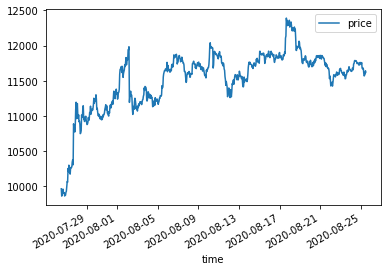

In [7]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'
headers= {"accept": "application/json"}
result = requests.get(url)
jbtc = result.json()



data =pd.DataFrame(jbtc['prices'], columns=['time', 'price'])
data['time']= pd.to_datetime(data['time'], unit='ms')
data.set_index('time', inplace=True)
data
data.plot()

# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

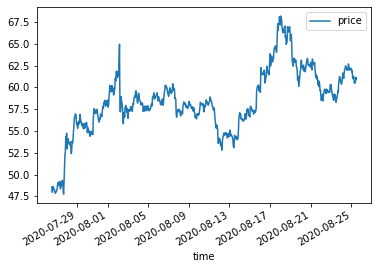

In [8]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/litecoin/market_chart?vs_currency=usd&days=30'
headers= {"accept": "application/json"}
result = requests.get(url)
jbtc = result.json()



data =pd.DataFrame(jbtc['prices'], columns=['time', 'price'])
data['time']= pd.to_datetime(data['time'], unit='ms')
data.set_index('time', inplace=True)
data
data.plot()

## Plot Litecoin and Dogecoin prices in USD in a lineplot for each for the last 30 days

In [9]:


coins=['litecoin','dogecoin']


df_multiple=pd.DataFrame()

for coin in coins:
    end_url = f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart?vs_currency=usd&days=30"
    
    result = requests.get(end_url)
    table = result.json()
    
    df =pd.DataFrame(table['prices'], columns=['time', f'{coin} price'])
    df['time']= pd.to_datetime(df['time'], unit='ms')
    
    df_multiple = pd.concat([df_multiple, df], axis=1) #[df1,df2], axis=1


df_multiple

,time,litecoin price,time,dogecoin price
0,2020-07-26 12:00:12.434,48.561413,2020-07-26 12:08:00.702,0.003224
1,2020-07-26 13:09:06.133,47.964552,2020-07-26 13:01:29.406,0.003199
2,2020-07-26 14:07:57.865,48.176288,2020-07-26 14:01:41.361,0.003200
3,2020-07-26 15:09:01.269,48.608722,2020-07-26 15:01:59.056,0.003200
4,2020-07-26 16:03:50.151,48.441034,2020-07-26 16:06:36.990,0.003200
...,...,...,...,...
718,2020-08-25 09:02:20.603,60.502701,2020-08-25 08:03:24.953,0.003363
719,2020-08-25 10:07:18.523,60.788897,2020-08-25 09:08:56.866,0.003389
720,2020-08-25 11:04:31.117,61.153169,2020-08-25 10:10:54.289,0.003388
721,2020-08-25 11:24:47.000,60.957412,2020-08-25 11:01:24.700,0.003392


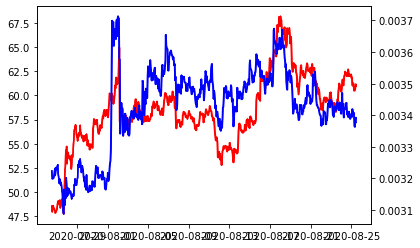

In [10]:

fig, ax1 = plt.subplots()
ax1.plot(df_multiple['time'], df_multiple['litecoin price'], color='r')
ax2 = ax1.twinx()
ax2.plot(df_multiple['time'], df_multiple['dogecoin price'], color='b')

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [20]:
end_url = "https://api.coingecko.com/api/v3/coins/list"
    
result = requests.get(end_url)
jsonformat = result.json()
df =pd.DataFrame(jsonformat)
df=df.assign(market_cap=None)
df

,id,symbol,name,market_cap
0,01coin,zoc,01coin,None
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,None
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token,None
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token,None
4,0-5x-long-bilibra-token,trybhalf,0.5X Long BiLira Token,None
...,...,...,...,...
5873,zvchain,zvc,ZVCHAIN,None
5874,zxth,zxth,ZXTH,None
5875,zynecoin,zyn,Zynecoin,None
5876,zyx,zyx,ZYX,None


In [25]:
df.sample(10)

,id,symbol,name,market_cap
457,arcblock,abt,Arcblock,None
3585,modern-investment-coin,modic,Modern Investment Coin,None
265,ad-flex-token,adf,Ad Flex Token,None
5150,t-os,tosc,T.OS,None
5246,trustline-network,tln,Trustlines Network,None
5487,viewly,view,View,None
5872,zumy,zmy,Zumy,None
2360,fox-token,fox,FOX Token,None
2222,ezoow,ezw,EZOOW,None
1221,cdai,cdai,cDAI,None


In [34]:
df_each=[]
for coin in df['id']:
    try: 
        end_url = f"https://api.coingecko.com/api/v3/simple/price?ids={coin}&vs_currencies=USD&include_market_cap=true"
        result = requests.get(end_url)
        table = result.json()
        df_each=df_each.append(table[coin]['usd_market_cap'])
    except AttributeError:
        df_each=df_each.append(0)

    

df_each

AttributeError: 'NoneType' object has no attribute 'append'

In [32]:
df_each

In [26]:
end_url = "https://api.coingecko.com/api/v3/simple/price?ids=01coin&vs_currencies=USD&include_market_cap=true"
result = requests.get(end_url)
table = result.json()
table['01coin']['usd_market_cap']

33038.11493052417

## Make a csv called 'top_ten_report.csv' and check that it worked